### **Installing Scikit-Learn Intel(R) Extension**

In [53]:
!pip install scikit-learn-intelex

### **Importing OneDAL Library for Data Analytics**

In [54]:
import daal4py.sklearn
daal4py.sklearn.patch_sklearn()

dispatcher.py:151: FutureWarning: 
Scikit-learn patching with daal4py is deprecated and will be removed in the future.
Use Intel(R) Extension for Scikit-learn* module instead (pip install scikit-learn-intelex).
To enable patching, please use one of the following options:
1) From the command line:
    python -m sklearnex <your_script>
2) From your script:
    from sklearnex import patch_sklearn
    patch_sklearn()
Intel(R) oneAPI Data Analytics Library solvers for sklearn enabled: https://intelpython.github.io/daal4py/sklearn.html


In [55]:
from sklearnex import patch_sklearn
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [56]:
import numpy as np
import pandas as pd

In [57]:
# Reading the Coal Consumption CSV file
df_coal=pd.read_csv("/kaggle/input/one-api-hackathon/Copy of world-coal-consumption-1978-2020.csv")

In [58]:
# Reading the Silicon Mining CSV file
df_silicon=pd.read_csv("/kaggle/input/one-api-hackathon/Silicon.csv")

In [59]:
# Checking for null values in the dataframe
df_coal.isnull().sum()

Year                  0
India                 1
United States         1
Russian Federation    1
Rest of the world     1
South Africa          1
PR of China           1
Brazil                0
Canada                0
France                0
Iceland               0
Norway                0
Ukraine               0
Venezuela             0
dtype: int64

In [60]:
# Checking for null values in the dataframe
df_silicon.isnull().sum()

YEARS              0
USA                3
BRAZIL             3
CANADA             3
CHINA              3
FRANCE             3
ICELAND            3
INDIA              3
NORWAY             3
RUSSIA             3
SOUTH AFRICA       5
UKRAINE            3
VENEZUELA          8
OTHER COUNTRIES    3
dtype: int64

In [61]:
df_silicon

,YEARS,USA,BRAZIL,CANADA,CHINA,FRANCE,ICELAND,INDIA,NORWAY,RUSSIA,SOUTH AFRICA,UKRAINE,VENEZUELA,OTHER COUNTRIES
0,1995,468.0,300.0,72.0,864.0,108.0,48.0,72.0,420.0,408.0,120.0,312.0,36.0,156.0
1,1996,496.8,324.0,72.0,864.0,156.0,54.0,72.0,450.0,324.0,108.0,234.0,30.0,120.0
2,1997,508.8,372.0,79.2,972.0,168.0,56.4,66.0,504.0,312.0,120.0,228.0,38.4,168.0
3,1998,519.6,312.0,69.6,1056.0,192.0,55.2,66.0,504.0,456.0,144.0,234.0,46.8,132.0
4,1999,510.0,283.2,57.6,936.0,174.0,62.4,69.6,474.0,446.4,118.8,234.0,55.2,132.0
5,2000,448.8,258.0,78.0,1044.0,174.0,70.8,39.6,492.0,552.0,116.4,234.0,50.4,138.0
6,2001,361.2,282.0,70.8,1170.0,164.4,57.6,43.2,454.8,561.6,116.4,253.2,44.4,247.2
7,2002,324.0,300.0,82.8,1800.0,168.0,56.4,40.8,480.0,588.0,132.0,240.0,69.6,276.0
8,2003,300.0,276.0,84.0,1920.0,120.0,87.6,40.8,420.0,576.0,132.0,276.0,69.6,252.0
9,2004,288.0,276.0,79.2,2640.0,180.0,94.8,42.0,396.0,636.0,168.0,216.0,74.4,252.0


In [62]:
# Filling null values with the average of other values present in that column
column_averages = df_coal.mean()
df_coal.fillna(column_averages, inplace=True)
df_coal

,Year,India,United States,Russian Federation,Rest of the world,South Africa,PR of China,Brazil,Canada,France,Iceland,Norway,Ukraine,Venezuela
0,1995,5129.635076,19792.818920,5386.020376,14308.221200,1765.181809,12853.310120,471.577016,1039.087801,706.370220,1.919106,27.724432,2141.352353,1.148364
1,1996,5332.305867,20541.710570,5438.686766,13979.174560,1862.455593,13171.385880,490.945266,1109.348133,730.505761,1.948631,27.213120,1603.480864,1.186371
2,1997,5529.111836,21069.665900,4925.446359,14243.667940,1996.339647,13092.687780,491.240779,1179.033567,652.166658,1.712434,26.787028,1607.186200,1.401669
3,1998,5519.005989,21141.136980,4650.391720,14607.781390,2252.853265,13035.464490,473.526768,1250.052599,757.030465,2.066730,29.570833,1639.447993,1.786250
4,1999,5878.440446,21329.230030,5005.701605,14326.331920,2540.398397,13764.754670,517.918915,1240.072609,693.661636,1.771483,28.491399,1723.771540,2.150188
5,2000,6041.423991,22252.915770,5035.716954,15527.510970,2619.963118,14590.460520,536.307588,1280.115246,660.930518,2.981997,28.093712,1753.405218,2.072358
6,2001,6174.513721,21918.166790,4870.238934,15855.131240,2821.729285,16068.150200,531.481589,1351.717332,583.850461,2.893422,24.969032,1699.395644,1.986966
7,2002,6390.885289,22228.576030,4924.495659,16117.913150,2827.765139,16392.950390,482.126248,1268.378024,575.592239,2.893422,22.213633,1683.231745,1.872689
8,2003,6539.270572,22181.505690,4985.082197,16883.934360,2948.747230,17091.891140,500.550171,1180.553590,588.152753,2.509601,21.475073,1887.024773,1.756595
9,2004,7253.264266,22943.117060,4870.437187,17259.273730,3065.767934,18260.022780,534.146789,1208.054012,571.149626,3.070570,24.003222,1751.158832,1.613029


In [63]:
# Filling null values with the average of other values present in that column
column_averages = df_silicon.mean()
df_silicon.fillna(column_averages, inplace=True)
df_silicon

,YEARS,USA,BRAZIL,CANADA,CHINA,FRANCE,ICELAND,INDIA,NORWAY,RUSSIA,SOUTH AFRICA,UKRAINE,VENEZUELA,OTHER COUNTRIES
0,1995,468.00,300.00,72.00,864.00,108.00,48.0,72.00,420.0,408.0,120.000000,312.0,36.000000,156.00
1,1996,496.80,324.00,72.00,864.00,156.00,54.0,72.00,450.0,324.0,108.000000,234.0,30.000000,120.00
2,1997,508.80,372.00,79.20,972.00,168.00,56.4,66.00,504.0,312.0,120.000000,228.0,38.400000,168.00
3,1998,519.60,312.00,69.60,1056.00,192.00,55.2,66.00,504.0,456.0,144.000000,234.0,46.800000,132.00
4,1999,510.00,283.20,57.60,936.00,174.00,62.4,69.60,474.0,446.4,118.800000,234.0,55.200000,132.00
5,2000,448.80,258.00,78.00,1044.00,174.00,70.8,39.60,492.0,552.0,116.400000,234.0,50.400000,138.00
6,2001,361.20,282.00,70.80,1170.00,164.40,57.6,43.20,454.8,561.6,116.400000,253.2,44.400000,247.20
7,2002,324.00,300.00,82.80,1800.00,168.00,56.4,40.80,480.0,588.0,132.000000,240.0,69.600000,276.00
8,2003,300.00,276.00,84.00,1920.00,120.00,87.6,40.80,420.0,576.0,132.000000,276.0,69.600000,252.00
9,2004,288.00,276.00,79.20,2640.00,180.00,94.8,42.00,396.0,636.0,168.000000,216.0,74.400000,252.00


In [64]:
import matplotlib.pyplot as plt

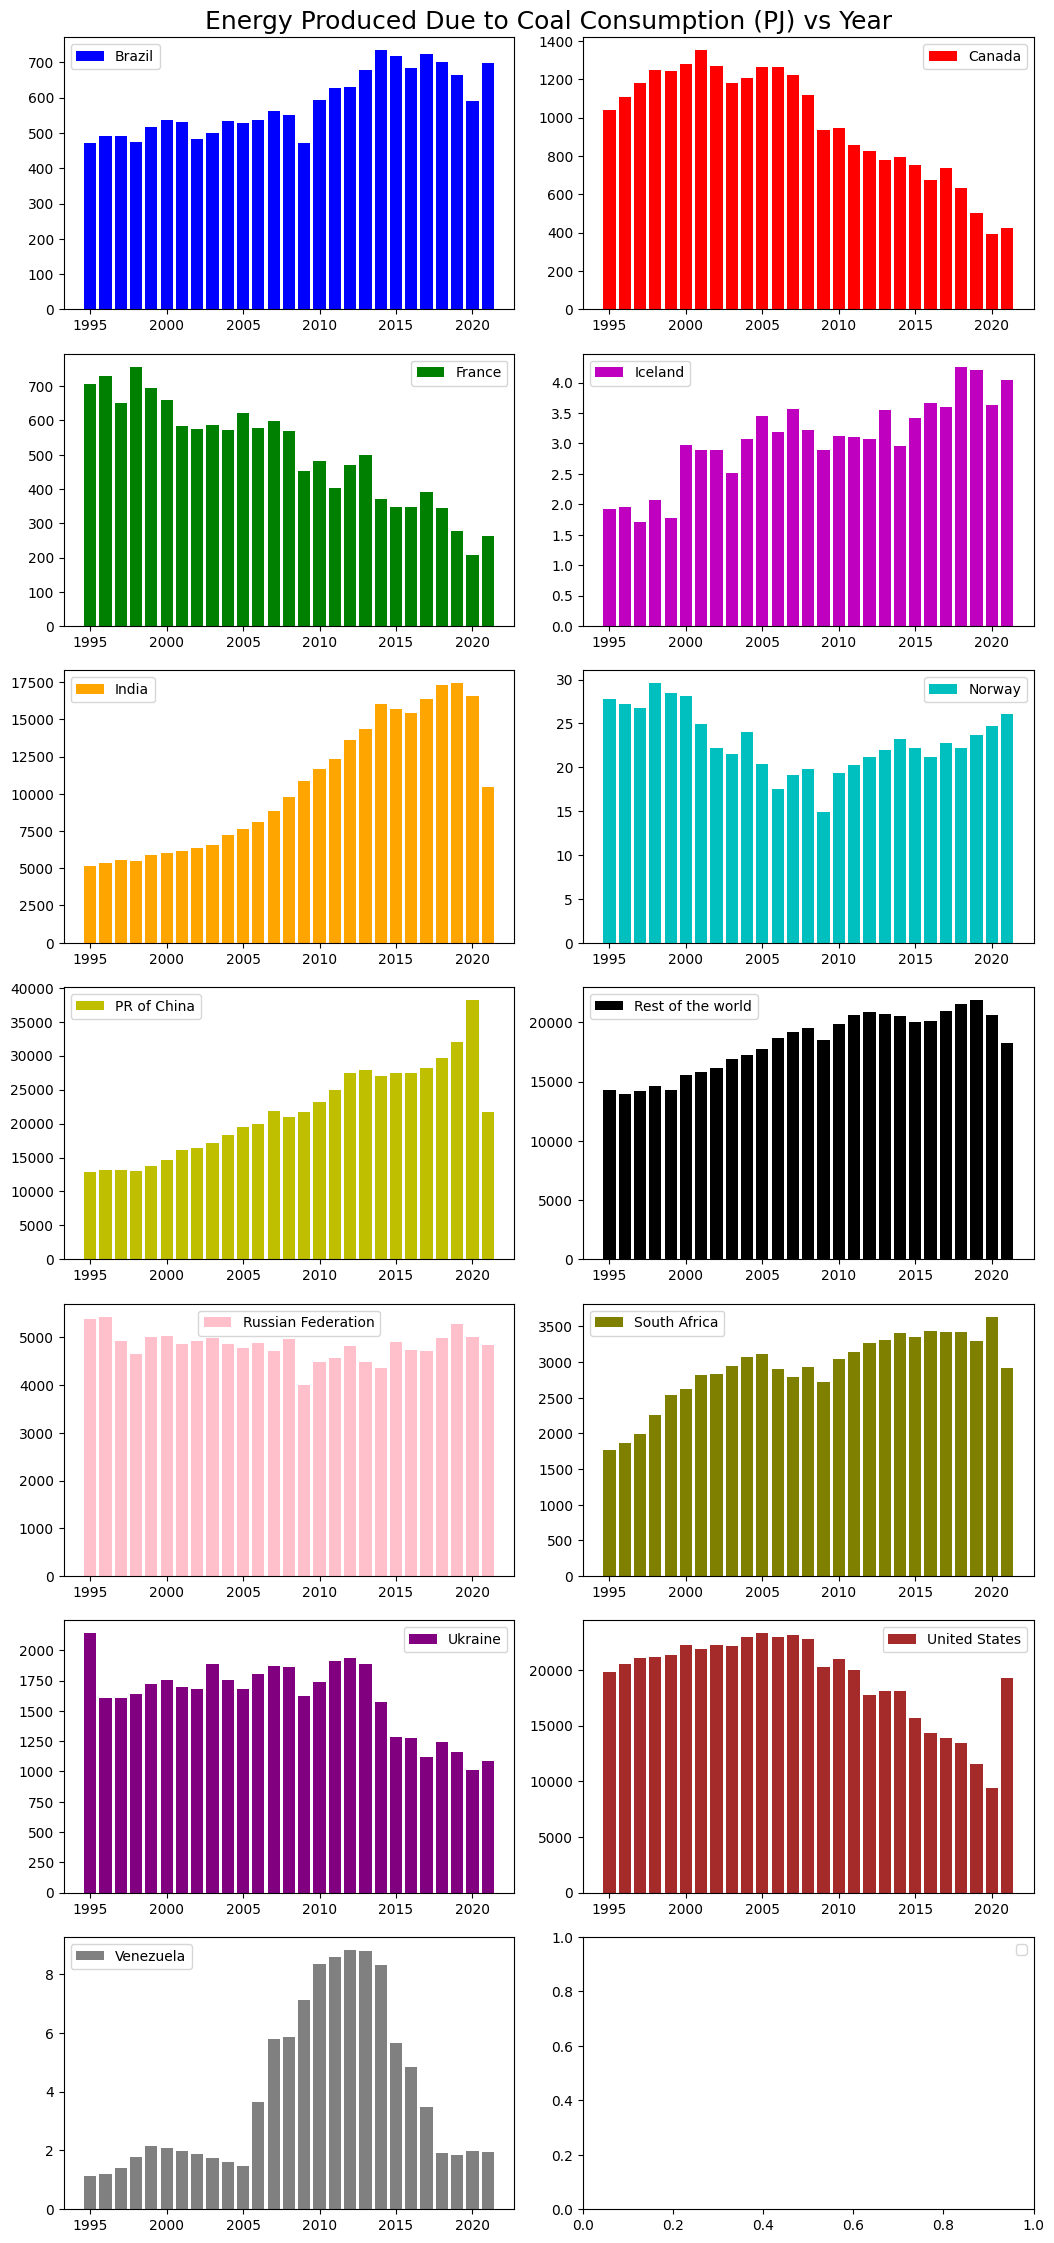

In [65]:
# Plotting the graph between Energy Production due to Coal Consumption (in Petajoules) vs Year for different countries.  
x = df_coal['Year']
y1 = df_coal['Brazil']
y2 = df_coal['Canada']
y3 = df_coal['France ']
y4 =  df_coal['Iceland ']
y5 = df_coal['India']
y6 = df_coal['Norway']
y7 = df_coal['PR of China']
y8 =  df_coal['Rest of the world']
y9 = df_coal['Russian Federation']
y10 = df_coal['South Africa']
y11 = df_coal['Ukraine']
y12 =  df_coal['United States']
y13 = df_coal['Venezuela']

fig, axes = plt.subplots(7, 2, figsize=(10, 24))

axes[0, 0].bar(x, y1, label='Brazil', color='b')
#axes[0, 0].set_title('Plot 1')

axes[0, 1].bar(x, y2, label='Canada', color='r')
#axes[0, 1].set_title('Plot 2')

axes[1, 0].bar(x, y3, label='France', color='g')
#axes[1, 0].set_title('Plot 3')

axes[1, 1].bar(x, y4, label='Iceland', color='m')
#axes[1, 1].set_title('Plot 4')

axes[2, 0].bar(x, y5, label='India', color='orange')
#axes[2, 0].set_title('Plot 5')

axes[2, 1].bar(x, y6, label='Norway', color='c')
#axes[2, 1].set_title('Plot 6')

axes[3, 0].bar(x, y7, label='PR of China', color='y')
#axes[3, 0].set_title('Plot 7')

axes[3, 1].bar(x, y8, label='Rest of the world', color='k')
#axes[3, 1].set_title('Plot 8')

axes[4, 0].bar(x, y9, label='Russian Federation', color='pink')
#axes[4, 0].set_title('Plot 9')

axes[4, 1].bar(x, y10, label='South Africa', color='olive')
#axes[4, 1].set_title('Plot 10')

axes[5, 0].bar(x, y11, label='Ukraine', color='purple')
#axes[5, 0].set_title('Plot 11')

axes[5, 1].bar(x, y12, label='United States', color='brown')
#axes[5, 1].set_title('Plot 12')

axes[6, 0].bar(x, y13, label='Venezuela', color='gray')
#axes[6, 0].set_title('Plot 13')

for ax in axes.flatten():
    ax.legend()

#fig.suptitle('Energy Produced (PJ) vs Year',fontsize=18)
#plt.margins()
#plt.figtext(0.5, 0.95, 'Common Title for All Graphs', fontsize=16, ha='center')
common_title = fig.add_subplot(111, frameon=False)
common_title.set_position([0.5, 0.95, 0.0, 0.0])  # Adjust the position
common_title.set_title('Energy Produced Due to Coal Consumption (PJ) vs Year', fontsize=18)
common_title.axis('off')
plt.tight_layout()

plt.show()

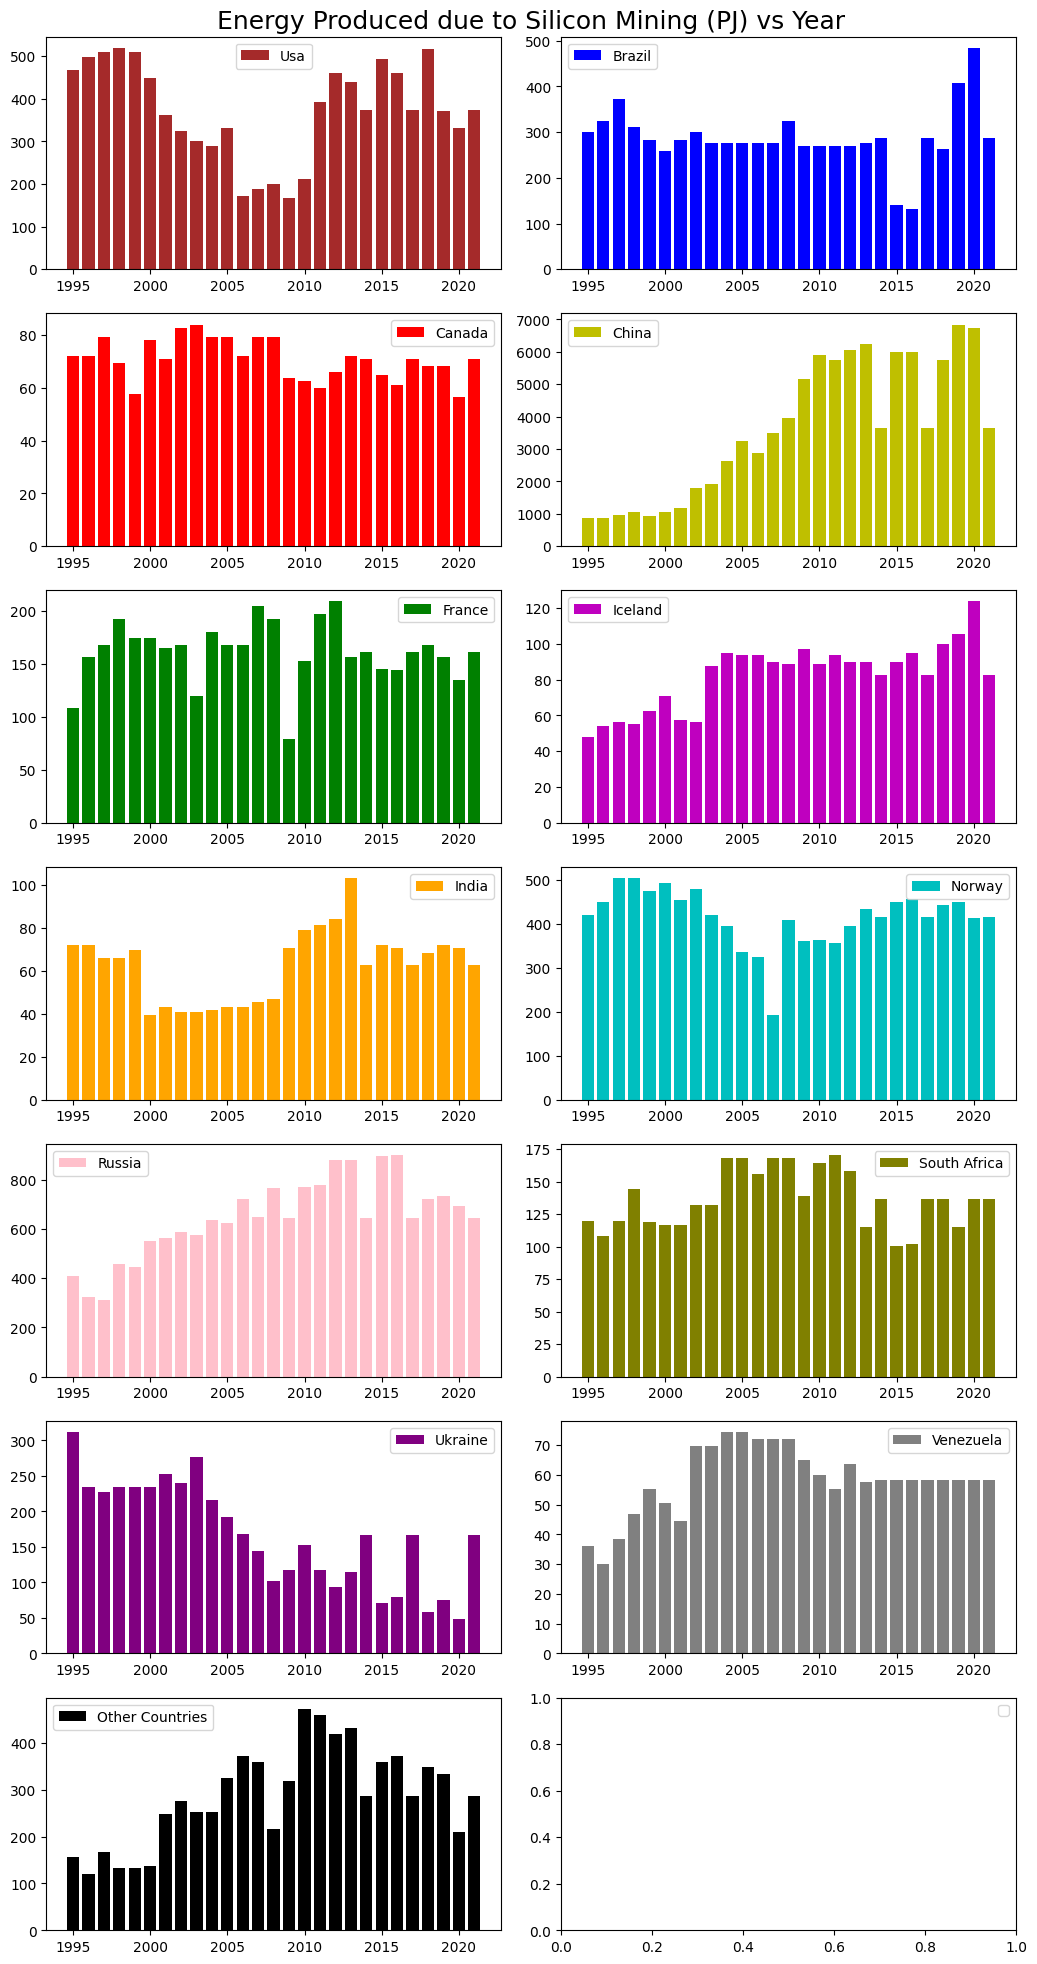

In [66]:
# Plotting the graph between Energy Production due to Silicon Mining (in Petajoules) vs Year for different countries. 
x = df_silicon['YEARS']
y1 = df_silicon['USA']
y2 = df_silicon['BRAZIL']
y3 = df_silicon['CANADA']
y4 = df_silicon['CHINA']
y5 = df_silicon['FRANCE']
y6 = df_silicon['ICELAND']
y7 = df_silicon['INDIA']
y8 = df_silicon['NORWAY']
y9 = df_silicon['RUSSIA']
y10 = df_silicon['SOUTH AFRICA']
y11 = df_silicon['UKRAINE']
y12 = df_silicon['VENEZUELA']
y13 = df_silicon['OTHER COUNTRIES']

fig, axes = plt.subplots(7, 2, figsize=(10, 21))

axes[0, 0].bar(x, y1, label='Usa', color='brown')
#axes[0, 0].set_title('Plot 1')

axes[0, 1].bar(x, y2, label='Brazil', color='b')
#axes[0, 1].set_title('Plot 2')

axes[1, 0].bar(x, y3, label='Canada', color='r')
#axes[1, 0].set_title('Plot 3')

axes[1, 1].bar(x, y4, label='China', color='y')
#axes[1, 1].set_title('Plot 4')

axes[2, 0].bar(x, y5, label='France', color='g')
#axes[2, 0].set_title('Plot 5')

axes[2, 1].bar(x, y6, label='Iceland', color='m')
#axes[2, 1].set_title('Plot 6')

axes[3, 0].bar(x, y7, label='India', color='orange')
#axes[3, 0].set_title('Plot 7')

axes[3, 1].bar(x, y8, label='Norway', color='c')
#axes[3, 1].set_title('Plot 8')

axes[4, 0].bar(x, y9, label='Russia', color='pink')
#axes[4, 0].set_title('Plot 9')

axes[4, 1].bar(x, y10, label='South Africa', color='olive')
#axes[4, 1].set_title('Plot 10')

axes[5, 0].bar(x, y11, label='Ukraine', color='purple')
#axes[5, 0].set_title('Plot 11')

axes[5, 1].bar(x, y12, label='Venezuela', color='gray')
#axes[5, 1].set_title('Plot 12')

axes[6, 0].bar(x, y13, label='Other Countries', color='k')
#axes[6, 0].set_title('Plot 13')

for ax in axes.flatten():
    ax.legend()

common_title = fig.add_subplot(111, frameon=False)
common_title.set_position([0.5, 0.95, 0.0, 0.0]) 
common_title.set_title('Energy Produced due to Silicon Mining (PJ) vs Year', fontsize=18)
common_title.axis('off')
plt.tight_layout()

plt.show()

### **Importing Prophet by Facebook https://research.facebook.com/blog/2017/2/prophet-forecasting-at-scale/**

In [67]:
from prophet import Prophet

In [68]:
# Predicting Future Values for energy production by Coal Consumption (yearly) from 2023 to 2050, using prophet by facebook.

countries = ['India', 'United States', 'Russian Federation', 'Rest of the world','South Africa', 'PR of China', 'Brazil', 'Canada','France ','Iceland ', 'Norway', 'Ukraine', 'Venezuela']
models = [Prophet() for _ in range(len(countries))]
energy_data_list = []
for i in range(len(countries)):
    energy_data = pd.DataFrame(columns=['ds','y'])
    energy_data['ds'] = df_coal['Year']  # Assuming 'Year' is the column name
    energy_data['y'] = df_coal[countries[i]]
    
    energy_data_list.append(energy_data)  # Append energy_data to the list
    models[i].fit(energy_data)
future_predictions = []
for country_idx, country in enumerate(countries):
    predictions = pd.DataFrame(columns=['ds', country])
    for year in range(2022, 2051):
        current_year = pd.DataFrame({'ds': [pd.Timestamp(f'{year}-01-01')]})
        forecast = models[country_idx].predict(current_year)
        prediction_for_year = forecast.loc[0, 'yhat']
        predictions = pd.concat([predictions, pd.DataFrame({country: [prediction_for_year]})], ignore_index=True)
    future_predictions.append(predictions)

17:42:31 - cmdstanpy - INFO - Chain [1] start processing
17:42:31 - cmdstanpy - INFO - Chain [1] done processing
17:42:31 - cmdstanpy - INFO - Chain [1] start processing
17:42:31 - cmdstanpy - INFO - Chain [1] done processing
17:42:31 - cmdstanpy - INFO - Chain [1] start processing
17:42:32 - cmdstanpy - INFO - Chain [1] done processing
17:42:32 - cmdstanpy - INFO - Chain [1] start processing
17:42:32 - cmdstanpy - INFO - Chain [1] done processing
17:42:32 - cmdstanpy - INFO - Chain [1] start processing
17:42:32 - cmdstanpy - INFO - Chain [1] done processing
17:42:32 - cmdstanpy - INFO - Chain [1] start processing
17:42:32 - cmdstanpy - INFO - Chain [1] done processing
17:42:32 - cmdstanpy - INFO - Chain [1] start processing
17:42:33 - cmdstanpy - INFO - Chain [1] done processing
17:42:33 - cmdstanpy - INFO - Chain [1] start processing
17:42:33 - cmdstanpy - INFO - Chain [1] done processing
17:42:33 - cmdstanpy - INFO - Chain [1] start processing
17:42:33 - cmdstanpy - INFO - Chain [1]

In [69]:
# Concatinating the dataframes produced from the above code.
df_future_predictions = pd.concat(future_predictions, axis=1)
df_future_predictions = df_future_predictions[['ds'] + countries]
df_future_predictions.drop('ds',axis=1,inplace=True)
df_future_predictions[df_future_predictions < 0] = 0
years = list(range(2022, 2051))  
df_future_predictions.insert(0, 'Year', years)
df_future_predictions

,Year,India,United States,Russian Federation,Rest of the world,South Africa,PR of China,Brazil,Canada,France,Iceland,Norway,Ukraine,Venezuela
0,2022,17548.557585,14544.054472,4930.479300,20940.567344,3653.727089,32443.591847,721.067625,534.585985,251.057353,4.141612,20.341389,1260.556656,5.787208
1,2023,18326.076043,13636.827478,5077.990209,21145.280464,3737.348561,34055.038859,729.375207,481.842504,229.280627,4.210852,20.534541,1256.361962,5.943634
2,2024,18955.819394,12725.718015,5197.285373,21048.342082,3814.372920,35571.195812,732.735954,425.359708,208.600981,4.291068,20.800761,1235.942635,6.085266
3,2025,18670.137962,14013.700158,4878.529313,20627.957545,3776.434376,33894.821940,746.446850,455.106976,199.842774,4.391758,19.527328,1148.387706,6.155259
4,2026,19595.114403,13111.033585,5054.092661,21134.150429,3866.621470,35600.564415,759.702598,406.129363,176.973990,4.450035,19.646959,1160.391074,6.326455
5,2027,20372.632861,12203.806591,5201.603569,21338.863548,3950.242942,37212.011427,768.010180,353.385882,155.197264,4.519275,19.840111,1156.196381,6.482882
6,2028,21002.376211,11292.697129,5320.898733,21241.925166,4027.267301,38728.168379,771.370927,296.903086,134.517617,4.599491,20.106331,1135.777054,6.624513
7,2029,20716.694780,12580.679271,5002.142673,20821.540630,3989.328756,37051.794508,785.081823,326.650354,125.759410,4.700181,18.832898,1048.222125,6.694506
8,2030,21641.671220,11678.012699,5177.706021,21327.733513,4079.515850,38757.536983,798.337571,277.672740,102.890627,4.758458,18.952529,1060.225493,6.865703
9,2031,22419.189679,10770.785705,5325.216930,21532.446632,4163.137323,40368.983995,806.645153,224.929259,81.113901,4.827698,19.145680,1056.030800,7.022129


In [70]:
# Predicting Future Values for energy production by Silicon Mining (yearly) from 2023 to 2050, using prophet by facebook.

countries = ['USA', 'BRAZIL', 'CANADA', 'CHINA','FRANCE', 'ICELAND', 'INDIA', 'NORWAY','RUSSIA','SOUTH AFRICA', 'UKRAINE', 'VENEZUELA', 'OTHER COUNTRIES']
models = [Prophet() for _ in range(len(countries))]
energy_data_list = []
for i in range(len(countries)):
    energy_data = pd.DataFrame(columns=['ds','y'])
    energy_data['ds'] = df_silicon['YEARS']  # Assuming 'Year' is the column name
    energy_data['y'] = df_silicon[countries[i]]
    
    energy_data_list.append(energy_data)  # Append energy_data to the list
    models[i].fit(energy_data)
future_predictions = []
for country_idx, country in enumerate(countries):
    predictions = pd.DataFrame(columns=['ds', country])
    for year in range(2022, 2051):
        current_year = pd.DataFrame({'ds': [pd.Timestamp(f'{year}-01-01')]})
        forecast = models[country_idx].predict(current_year)
        prediction_for_year = forecast.loc[0, 'yhat']
        predictions = pd.concat([predictions, pd.DataFrame({country: [prediction_for_year]})], ignore_index=True)
    future_predictions.append(predictions)

17:44:51 - cmdstanpy - INFO - Chain [1] start processing
17:44:51 - cmdstanpy - INFO - Chain [1] done processing
17:44:51 - cmdstanpy - INFO - Chain [1] start processing
17:44:51 - cmdstanpy - INFO - Chain [1] done processing
17:44:51 - cmdstanpy - INFO - Chain [1] start processing
17:44:52 - cmdstanpy - INFO - Chain [1] done processing
17:44:52 - cmdstanpy - INFO - Chain [1] start processing
17:44:52 - cmdstanpy - INFO - Chain [1] done processing
17:44:52 - cmdstanpy - INFO - Chain [1] start processing
17:44:52 - cmdstanpy - INFO - Chain [1] done processing
17:44:52 - cmdstanpy - INFO - Chain [1] start processing
17:44:52 - cmdstanpy - INFO - Chain [1] done processing
17:44:52 - cmdstanpy - INFO - Chain [1] start processing
17:44:52 - cmdstanpy - INFO - Chain [1] done processing
17:44:52 - cmdstanpy - INFO - Chain [1] start processing
17:44:53 - cmdstanpy - INFO - Chain [1] done processing
17:44:53 - cmdstanpy - INFO - Chain [1] start processing
17:44:53 - cmdstanpy - INFO - Chain [1]

In [71]:
# Concatinating the dataframes produced from the above code.
df_future_predictions_silicon = pd.concat(future_predictions, axis=1)
df_future_predictions_silicon = df_future_predictions_silicon[['ds'] + countries]
df_future_predictions_silicon.drop('ds',axis=1,inplace=True)
df_future_predictions_silicon[df_future_predictions_silicon < 0] = 0
years = list(range(2022, 2051))  
df_future_predictions_silicon.insert(0, 'YEARS', years)

In [72]:
# Concatinating the original and future predicted dataframe.
concatenated_df_silicon = pd.concat([df_silicon, df_future_predictions_silicon], axis=0)
concatenated_df_silicon.reset_index(drop=True, inplace=True)

In [73]:
# Concatinating the original and future predicted dataframe.
concatenated_df_coal = pd.concat([df_coal, df_future_predictions], axis=0)
concatenated_df_coal.reset_index(drop=True, inplace=True)

1. **93.122514 kg** of CO2 is produced by bituminous (non-coking coal) per million btu or 10^9 joules of energy consumed.

2. **39 kg** of CO2 is produced by silicon mining per million btu or 10^9 joules of energy consumed.
   **0.5 kg** of CO2 is produced by solar panel production per million btu or 10^9 joules of energy consumed.
   So, in total **39.5 kg** per 10^9 joules of energy consumed.

In [74]:
constant = 93.122514 * 10**6
concatenated_df_coal.iloc[:, 1:] *= constant

In [75]:
constant = 39.5* 10**6
concatenated_df_silicon.iloc[:, 1:] *= constant

###  **Converting Kilograms to Megatonne (10^9 Kg)**

In [76]:
constant = 10**9
concatenated_df_silicon.iloc[:, 1:] /= constant
concatenated_df_coal.iloc[:, 1:] /= constant

In [77]:
# Reducing the consumption of coal to 30% and increasing the consumption/Mining of silicon to 170%.
# Impact Factor is the factor which tells how much the original trend is deviated from the devised trend.
# Here, we are getting impact factor from 2023 to 2030.

Coal_CO2_onging_2023_2030= concatenated_df_coal.iloc[28:35, 1:].sum().sum()
Coal_CO2_devised_2023_2030= concatenated_df_coal.iloc[28:35,1:].sum().sum() * 0.30
Silicon_CO2_onging_2023_2030= concatenated_df_silicon.iloc[28:35, 1:].sum().sum()
Silicon_CO2_devised_2023_2030= concatenated_df_silicon.iloc[28:35, 1:].sum().sum() * 1.70
Impact_factor_23_30=(Coal_CO2_onging_2023_2030+Silicon_CO2_onging_2023_2030)/(Coal_CO2_devised_2023_2030+Silicon_CO2_devised_2023_2030)
print("Impact Factor from 2023-2030: ", Impact_factor_23_30)

Impact Factor from 2023-2030:  2.7703324163995293


In [78]:
# Reducing the consumption of coal to 20% and increasing the consumption/Mining of silicon to 180%.
# Impact Factor is the factor which tells how much the original trend is deviated from the devised trend.
# Here, we are getting impact factor from 2031 to 2040.

Coal_CO2_onging_2031_2040= concatenated_df_coal.iloc[36:45, 1:].sum().sum()
Coal_CO2_devised_2031_2040= concatenated_df_coal.iloc[36:45,1:].sum().sum() * 0.20
Silicon_CO2_onging_2031_2040= concatenated_df_silicon.iloc[36:45, 1:].sum().sum()
Silicon_CO2_devised_2031_2040= concatenated_df_silicon.iloc[36:45, 1:].sum().sum() * 1.80
Impact_factor_31_40=(Coal_CO2_onging_2031_2040+Silicon_CO2_onging_2031_2040)/(Coal_CO2_devised_2031_2040+Silicon_CO2_devised_2031_2040)
print("Impact Factor from 2031-2040: ", Impact_factor_31_40)

Impact Factor from 2031-2040:  3.611887322067011


In [79]:
# Reducing the consumption of coal to 10% and increasing the consumption/Mining of silicon to 190%.
# Impact Factor is the factor which tells how much the original trend is deviated from the devised trend.
# Here, we are getting impact factor from 2041 to 2050.

Coal_CO2_onging_2041_2050= concatenated_df_coal.iloc[46:55, 1:].sum().sum()
Coal_CO2_devised_2041_2050= concatenated_df_coal.iloc[46:55,1:].sum().sum() * 0.10
Silicon_CO2_onging_2041_2050= concatenated_df_silicon.iloc[46:55, 1:].sum().sum()
Silicon_CO2_devised_2041_2050= concatenated_df_silicon.iloc[46:55, 1:].sum().sum() * 1.90
Impact_factor_41_50=(Coal_CO2_onging_2041_2050+Silicon_CO2_onging_2041_2050)/(Coal_CO2_devised_2041_2050+Silicon_CO2_devised_2041_2050)
print("Impact Factor from 2041-2050: ", Impact_factor_41_50)

Impact Factor from 2041-2050:  5.161535872534337


In [80]:
# Impact Factor for every year from 2023 to 2050 is calculated.

def calculate_impact_factor(start_row, end_row, concatenated_df_coal, concatenated_df_silicon, coal_factor, silicon_factor):
    coal_CO2_onging = concatenated_df_coal.iloc[start_row:end_row, 1:].sum().sum()
    coal_CO2_devised = coal_CO2_onging * coal_factor

    silicon_CO2_onging = concatenated_df_silicon.iloc[start_row:end_row, 1:].sum().sum()
    silicon_CO2_devised = silicon_CO2_onging * silicon_factor

    if coal_CO2_devised + silicon_CO2_devised == 0:
        return None

    impact_factor = (coal_CO2_onging + silicon_CO2_onging) / (coal_CO2_devised + silicon_CO2_devised)

    return impact_factor
factors = [
    (27, 28, 0.30, 1.70),
    (28, 29, 0.29, 1.71),
    (29, 30, 0.28, 1.72),
    (30, 31, 0.27, 1.73),
    (31, 32, 0.26, 1.74),
    (32, 33, 0.24, 1.76),
    (33, 34, 0.22, 1.78),
    (34, 35, 0.21, 1.79),
    (35, 36, 0.20, 1.80),
    (36, 37, 0.19, 1.81),
    (37, 38, 0.18, 1.82),
    (38, 39, 0.17, 1.83),
    (39, 40, 0.16, 1.84),
    (40, 41, 0.15, 1.85),
    (41, 42, 0.14, 1.86),
    (42, 43, 0.13, 1.87),
    (43, 44, 0.12, 1.88),
    (44, 45, 0.11, 1.89),
    (45, 46, 0.10, 1.90),
    (46, 47, 0.09, 1.91),
    (47, 48, 0.08, 1.92),
    (48, 49, 0.07, 1.93),
    (49, 50, 0.06, 1.94),
    (50, 51, 0.05, 1.95),
    (51, 52, 0.04, 1.96),
    (52, 53, 0.03, 1.97),
    (53, 54, 0.02, 1.98),
    (54, 55, 0.01, 1.99),
]
Imp_fact=[]
for start_row, end_row, coal_factor, silicon_factor in factors:
    impact_factor = calculate_impact_factor(start_row, end_row, concatenated_df_coal, concatenated_df_silicon, coal_factor, silicon_factor)
    Imp_fact.append(impact_factor)
    print(f'Impact factor for {start_row}-{end_row}: {impact_factor}')

Impact factor for 27-28: 2.8000043382325526
Impact factor for 28-29: 2.8589514439380816
Impact factor for 29-30: 2.918520135473322
Impact factor for 30-31: 3.0182607496845244
Impact factor for 31-32: 3.0889352755687134
Impact factor for 32-33: 3.2545674101266027
Impact factor for 33-34: 3.434788142990889
Impact factor for 34-35: 3.5743220046230175
Impact factor for 35-36: 3.673626421535667
Impact factor for 36-37: 3.7734429472825677
Impact factor for 37-38: 3.8745991964108777
Impact factor for 38-39: 4.053893536181721
Impact factor for 39-40: 4.180531422576251
Impact factor for 40-41: 4.310251466978924
Impact factor for 41-42: 4.442599710557548
Impact factor for 42-43: 4.678587260297506
Impact factor for 43-44: 4.849065139532828
Impact factor for 44-45: 5.025575552656433
Impact factor for 45-46: 5.207359360499154
Impact factor for 46-47: 5.53197051411278
Impact factor for 47-48: 5.77399431033067
Impact factor for 48-49: 6.0268740842804585
Impact factor for 49-50: 6.289881903950176
Impa

In [81]:
Years = []
for i in range(2023, 2051):
    Years.append(i)

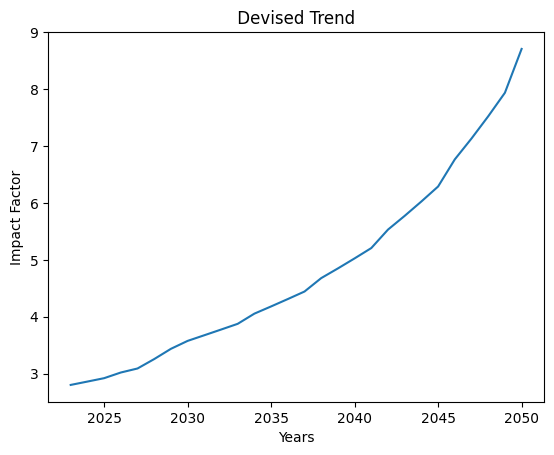

In [82]:
# Impact Factor v/s year (2023-2050) is plotted below.
# As you can see, it is increasing, thereby stating that overall impact of the devised trend is increasing.
# Ultimately, meaning that our devised trend, if followed, will impact for good towards our one and only beloved earth.

import matplotlib.pyplot as plt
plt.plot(Years, Imp_fact)
plt.xlabel('Years')
plt.ylabel('Impact Factor')
plt.title(' Devised Trend ')
plt.show()

In [83]:
# Total CO2 emission from 1995 to 2050 for ongoing trend.

total_sum_coal_CO2 = concatenated_df_coal.iloc[:, 1:].sum().sum()
print("Total CO2 emission due to coal in ongoing trend : ", total_sum_coal_CO2)
total_sum_silicon_CO2 = concatenated_df_silicon.iloc[:, 1:].sum().sum()
print("Total CO2 emission due to silicon in ongoing trend : ", total_sum_silicon_CO2)
total_CO2_emmissions_ongoing_trend=total_sum_coal_CO2+total_sum_silicon_CO2
print("Total CO2 emission in ongoing trend : ", total_CO2_emmissions_ongoing_trend)

Total CO2 emission due to coal in ongoing trend :  504606.63768824196
Total CO2 emission due to silicon in ongoing trend :  22103.791257432134
Total CO2 emission in ongoing trend :  526710.4289456741


In [84]:
# Total CO2 emission from 1995 to 2050 for devised trend.

sum_1995_to_2022 = concatenated_df_coal.iloc[0:27,1:].sum().sum()
sum_2023_to_2030 = concatenated_df_coal.iloc[28:35,1:].sum().sum() * 0.30
sum_2031_to_2040 = concatenated_df_coal.iloc[36:45,1:].sum().sum() * 0.20
sum_2041_to_2050 = concatenated_df_coal.iloc[46:55,1:].sum().sum() * 0.10
Coal_CO2_emission_devised_trend = sum_1995_to_2022 + sum_2023_to_2030 + sum_2031_to_2040 + sum_2041_to_2050
print("Total CO2 emission due to  Coal in devised trend: ", Coal_CO2_emission_devised_trend)

sum_1995_to_2022 = concatenated_df_silicon.iloc[0:27, 1:].sum().sum()
sum_2023_to_2030 = concatenated_df_silicon.iloc[28:35, 1:].sum().sum() * 1.70
sum_2031_to_2040 = concatenated_df_silicon.iloc[36:45, 1:].sum().sum() * 1.80
sum_2041_to_2050 = concatenated_df_silicon.iloc[46:55, 1:].sum().sum() * 1.90
Silicon_CO2_emission_devised_trend = sum_1995_to_2022 + sum_2023_to_2030 + sum_2031_to_2040 + sum_2041_to_2050
print("Total CO2 emission due to Silicon in devised trend: ", Silicon_CO2_emission_devised_trend)

total_CO2_emmissions_devised_trend=Silicon_CO2_emission_devised_trend+Coal_CO2_emission_devised_trend
print("Total CO2 emission in devised trend: ", total_CO2_emmissions_devised_trend)

Total CO2 emission due to  Coal in devised trend:  252479.12722870026
Total CO2 emission due to Silicon in devised trend:  30828.376203366468
Total CO2 emission in devised trend:  283307.50343206676


In [85]:
# Overall Impact Factor and it's meaning is explained below.

impact_factor=total_CO2_emmissions_ongoing_trend/total_CO2_emmissions_devised_trend
print("Impact Factor: ", impact_factor)

Impact Factor:  1.8591474724988073


1. As of 9th September, According to  **https://climateclock.world/** , 5 years and 316 days are left to get our things in control by reducing carbon emmision and decreasing the temperature of the earth before any catastrophic uncertainity happens.
2. According to our Devised plan/trend by reducing Coal Consumption and incresing Silicon Mining Ultimately using Solar Panels, we are getting an Impact factor Of **1.8591474725183381** which ultimately means we have delayed any catastrophic uncertainity to happen by: 
* **5 years and  316 days = 2142 days**
* **2142 days * Impact Factor(1.8591474725183381) = 3982 days** 
* **Delay = 3982-2142= 1840 days (which is around 5 years and 16 days)**
3. As the research for the cleaner, renewable and affordable energy source is still going on, we have given Scientists and other Researchers extra time to think upon and get better results.  